In [10]:
import pandas as pd
data_loc = 'Data/'
train = pd.read_csv(data_loc+'Train-label-28x28.csv',header=None)

In [64]:
features = train.loc[:,1:]
labels = train.loc[:,:0]
labels = labels.set_axis(['target'], axis=1, inplace=False)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train)

# Apply transform to both the training set and the test set.
train = scaler.transform(train)


In [74]:
labels.head()

,target
0,5
1,0
2,4
3,1
4,9


In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [76]:
principalDf.head()

,principal component 1,principal component 2
0,-0.908477,-4.800068
1,8.803181,-7.654654
2,2.265219,9.605394
3,-6.465516,-4.001098
4,-5.308134,3.389559


In [77]:
finalDf = pd.concat([principalDf, labels], axis = 1)


In [78]:
finalDf.head()

,principal component 1,principal component 2,target
0,-0.908477,-4.800068,5
1,8.803181,-7.654654,0
2,2.265219,9.605394,4
3,-6.465516,-4.001098,1
4,-5.308134,3.389559,9


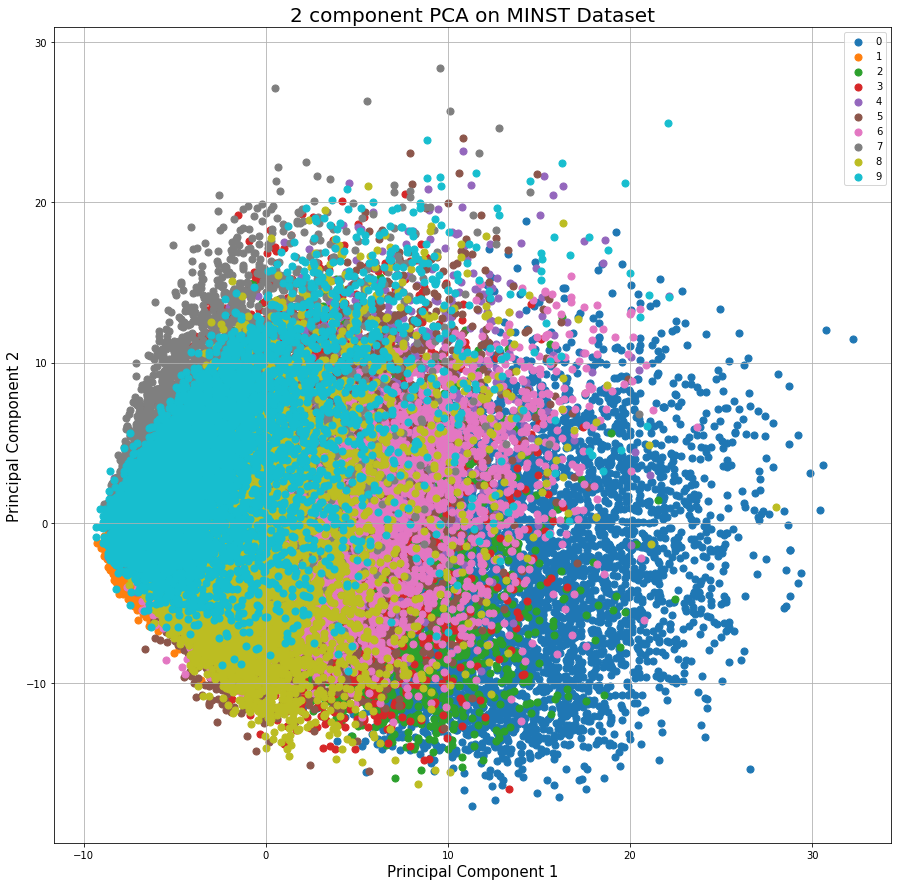

In [79]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA on MINST Dataset', fontsize = 20)

targets = [0,1,2,3,4,5,6,7,8,9]
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [159]:
clean_pca = pd.DataFrame(pca.explained_variance_ratio_)
#print(len(clean_pca))
#clean_pca.head(20)
# print(pca.explained_variance_ratio_[0])
# print(clean_pca[:5])
cumulative_pca = pd.DataFrame([[0]], columns=list('A'))
cum_tot = 0
for x in range(0,784):
    cum_tot += pca.explained_variance_ratio_[x]
    #add = pd.DataFrame([cum_tot])
    #cumulative_pca.append([cum_tot])
    #print(cum_tot)
cumulative_pca.head()

,A
0,0


In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=784)
principalComponents = pca.fit_transform(train)

#pca_values = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])

In [81]:
pca_values.explained_variance_ratio_

AttributeError: 'DataFrame' object has no attribute 'explained_variance_ratio_'

In [162]:
cum_pca = pd.read_csv('cum_pca.csv')

In [177]:
x = cum_pca['PCA_num']
y = cum_pca['Cum_PCA']

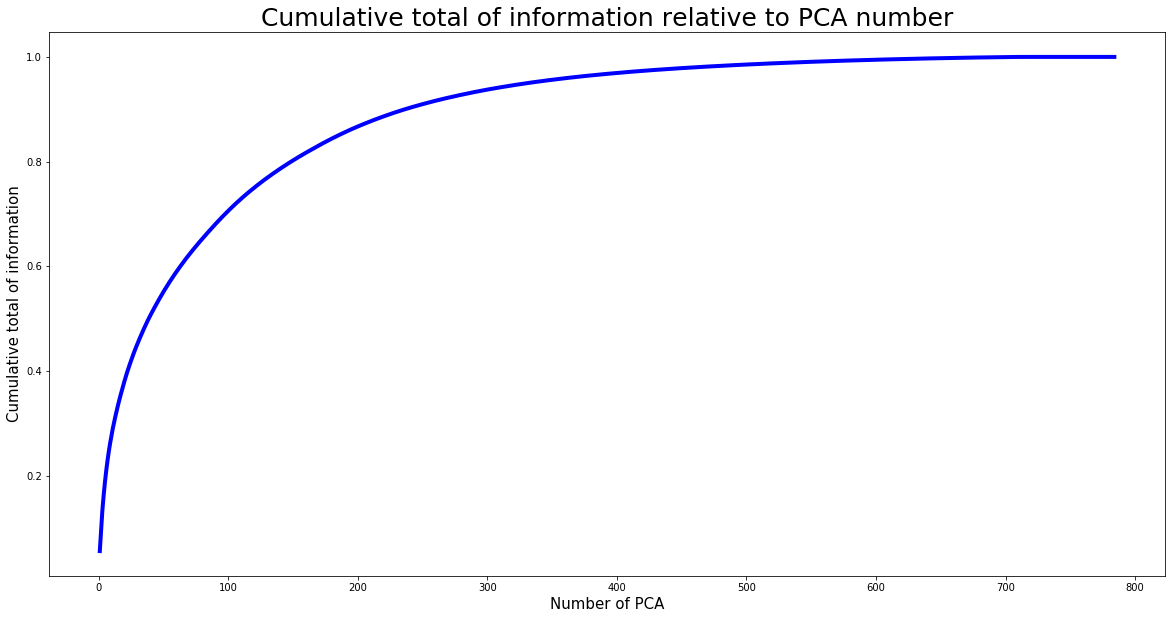

In [215]:
plt.figure(figsize=(20,10))
plt.plot(x,y, color='b',linewidth=4)

plt.xlabel('Number of PCA', fontsize = 15)
plt.ylabel('Cumulative total of information', fontsize = 15)
plt.title('Cumulative total of information relative to PCA number', fontsize = 25)
plt.show()
